## Data Science Project 

#### Imports

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, r2_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score

#### Data Wrangling and Bootstrapping

In [2]:
baton = pd.read_csv('Baton_Rouge.csv')

In [3]:
# drop unnecessary columns and NaN values
baton.columns
baton2 = baton.copy()
baton2 = baton2.drop(columns=['CRASH DATE', 'INCIDENT NUMBER', 'STREET ADDRESS', 'CITY', 'CITY', 'STATE', 'ZIP CODE', 'INTERSECTING STREET',
                            'DISTRICT', 'ZONE', 'SUBZONE', 'ACCESS CONTROL', 'ROADWAY CONDITION', 'SECONDARY FACTOR','LATITUDE','LONGITUDE','GEOMETRY','FATALITY'])
baton2.replace('Unknown', np.nan, inplace=True)
baton2.replace('Not applicable', np.nan, inplace=True)
baton2 = baton2.dropna()
baton2

CRASH OCCURRED ON             KIND OF LOCATION  \
1                    City street          Business Continuous   
2                  State highway  Business, Mixed Residential   
3                  State highway  Business, Mixed Residential   
4                  State highway  Business, Mixed Residential   
6                     Interstate  Business, Mixed Residential   
...                          ...                          ...   
18754  Off road/private property          Business Continuous   
18755                City street  Business, Mixed Residential   
18756                City street  Business, Mixed Residential   
18757              State highway                 Open Country   
18758                City street          Business Continuous   

                                TYPE OF ROADWAY ROAD SURFACE  \
1                                  ONE-WAY ROAD          Dry   
2                                  ONE-WAY ROAD          Dry   
3      TWO-WAY ROAD WITH NO PHYSICAL SEPARATION          Dry   
4      TWO-WAY ROAD WITH NO PHYSICAL SEPARATION          Wet   
6                                  ONE-WAY ROAD          Dry   
...                                         ...          ...   
18754     TWO-WAY ROAD WITH PHYSICAL SEPARATION          Dry   
18755  TWO-WAY ROAD WITH NO PHYSICAL SEPARATION          Dry   
18756     TWO-WAY ROAD WITH PHYSICAL SEPARATION          Dry   
18757  TWO-WAY ROAD WITH NO PHYSICAL SEPARATION          Wet   
18758                              ONE-WAY ROAD          Dry   

      WEATHER CONDITION               LIGHTING CONDITION  INJURY  HIT AND RUN  \
1                 Clear  Dark - continuous street lights       1            1   
2                 Clear                         Daylight       0            0   
3                 Clear                         Daylight       0            0   
4                  Rain                         Daylight       0            0   
6                Cloudy                         Daylight       1            1   
...                 ...                              ...     ...          ...   
18754             Clear  Dark - continuous street lights       0            1   
18755             Clear                         Daylight       0            1   
18756             Clear  Dark - continuous street lights       0            1   
18757             Clear          Dark - unknown lighting       0            0   
18758             Clear                         Daylight       0            0   

       PEDESTRIAN INVOLVED  TRAIN INVOLVED  INTERSECTION  TOTAL VEHICLES  \
1                        0               0             1               2   
2                        0               0             0               2   
3                        0               0             0               2   
4                        0               0             1               3   
6                        0               0             0               2   
...                    ...             ...           ...             ...   
18754                    0               0             0               2   
18755                    0               0             1               1   
18756                    0               0             0               2   
18757                    0               0             1               3   
18758                    0               0             0               2   

       VEHICLE ALIGNMENT            RELATION TO ROADWAY  \
1               Straight                     On roadway   
2               Straight                     On roadway   
3               Straight        In parking lane or zone   
4               Straight                     On roadway   
6            Curve Right                     On roadway   
...                  ...                            ...   
18754           Straight  Off roadway, location unknown   
18755  Not on trafficway                         Median   
18756           Straight                     On 

#### Preliminary Analysis

Text(0, 0.5, 'Count')

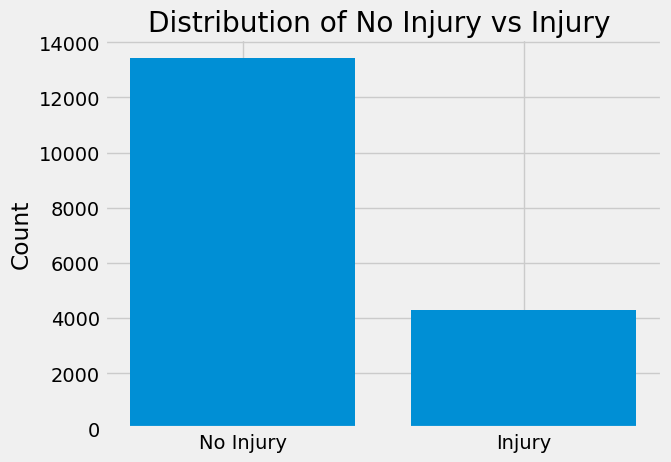

In [92]:
#barplot of frequency of injury vs no injury
injury_or_not = baton2.groupby("INJURY").size().reset_index(name="COUNT")
injury_or_not["INJURY"]=["No Injury","Injury"]
plt.bar(injury_or_not["INJURY"],injury_or_not["COUNT"])
plt.title("Distribution of No Injury vs Injury ")
plt.ylabel("Count")

#we noticed that there is large imbalance in proportion between injured and noninjured datapoints 

Text(0.5, 0, 'Count')

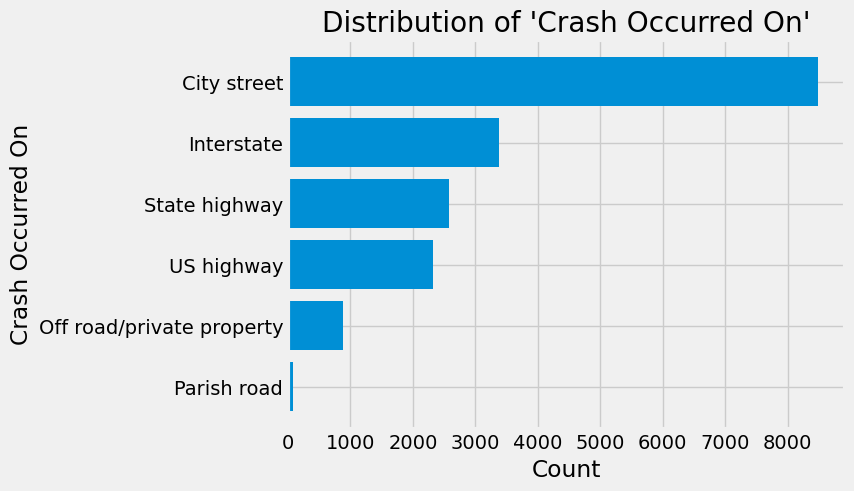

In [215]:
#Distribution of 'Crash Occurred On'
occurred = baton2.groupby("CRASH OCCURRED ON").size().reset_index(name="COUNT").sort_values('COUNT')
plt.barh(occurred["CRASH OCCURRED ON"],occurred["COUNT"])
plt.title("Distribution of 'Crash Occurred On'")
plt.ylabel("Crash Occurred On")
plt.xlabel("Count")

Text(0.5, 0, 'Count')

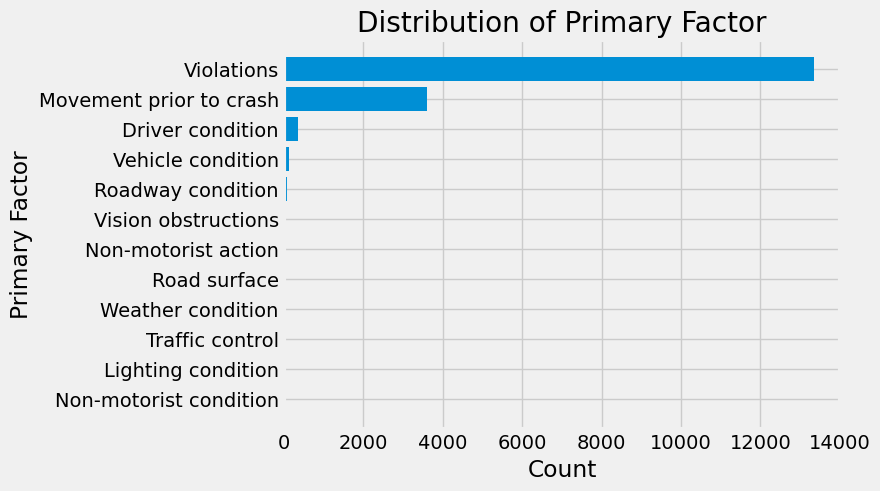

In [216]:
#Distribution of Primary Factor
factor = baton2.groupby("PRIMARY FACTOR").size().reset_index(name="COUNT").sort_values('COUNT')
plt.barh(factor["PRIMARY FACTOR"],factor["COUNT"])
plt.title("Distribution of Primary Factor")
plt.ylabel("Primary Factor")
plt.xlabel("Count")

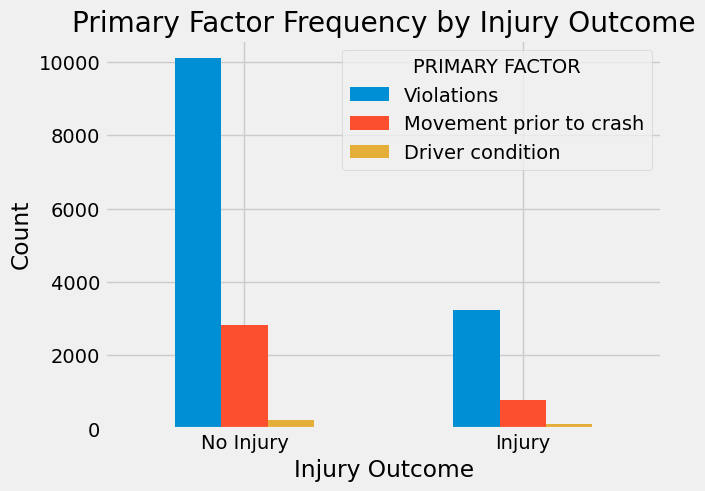

In [217]:
#Looking at the frequency of the most common primary factors by injury vs no injury
injury_factor_table = pd.pivot_table(baton2, values='CRASH OCCURRED ON', index=['INJURY'],
                       columns=['PRIMARY FACTOR'], aggfunc="count")
injury_factor_table = injury_factor_table[['Violations','Movement prior to crash', 'Driver condition']]
injury_factor_table.rename(index={0: 'No Injury', 1: 'Injury'}, inplace=True)
injury_factor_table.plot(kind='bar', title='Primary Factor Frequency by Injury Outcome', xlabel='Injury Outcome', ylabel='Count')
plt.xticks(rotation=360);



Text(0.5, 0, 'Count')

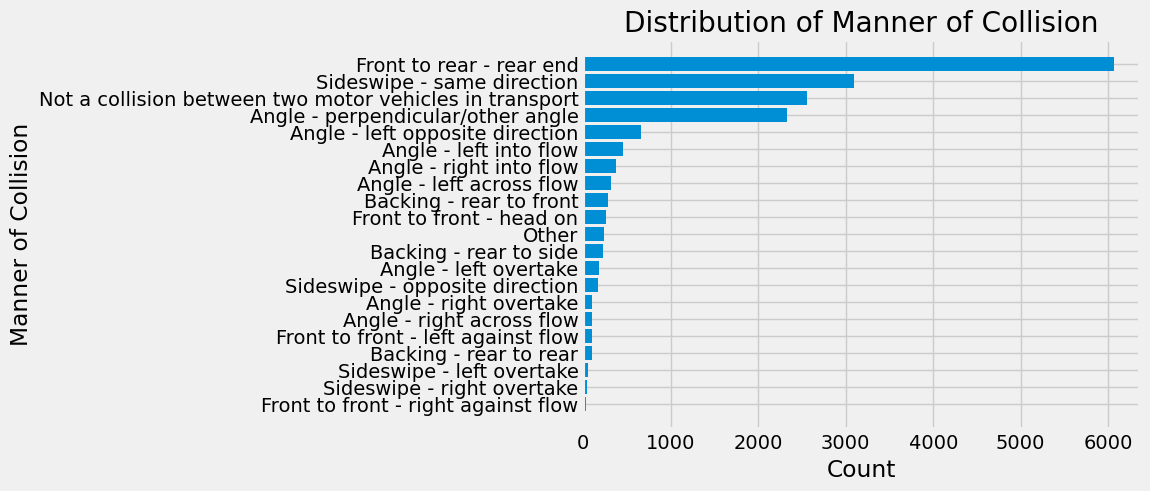

In [218]:
#Distribution of 'Manner of Collision'
manner = baton2.groupby("MANNER OF COLLISION").size().reset_index(name="COUNT").sort_values('COUNT')
plt.barh(manner["MANNER OF COLLISION"],manner["COUNT"])
plt.title("Distribution of Manner of Collision")
plt.ylabel("Manner of Collision")
plt.xlabel("Count")

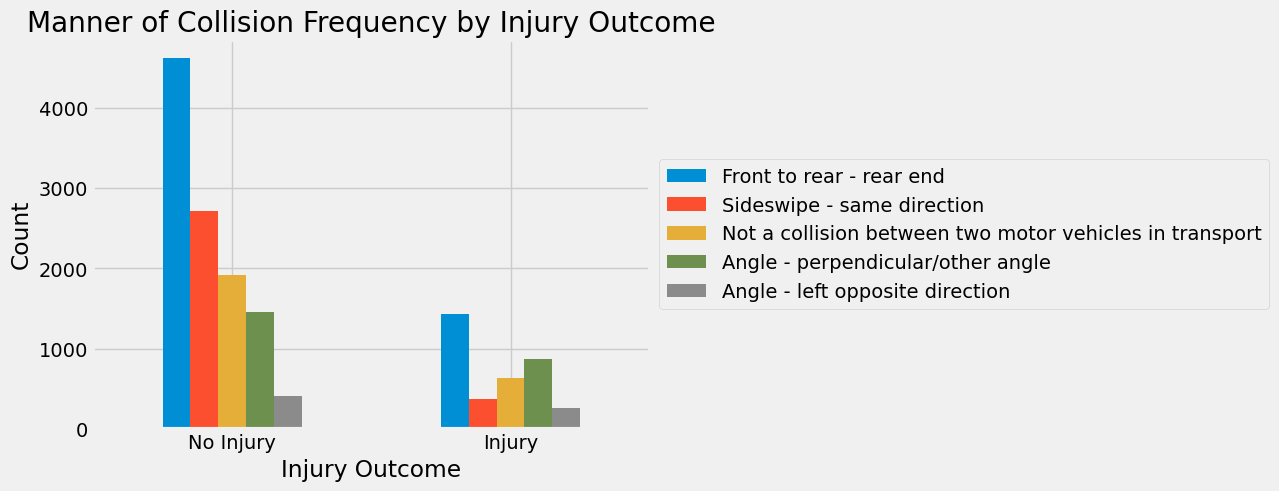

In [219]:
#Looking at the frequency of the most common manners of collision by injury vs no injury
injury_manner_table = pd.pivot_table(baton2, values='CRASH OCCURRED ON', index=['INJURY'],
                       columns=['MANNER OF COLLISION'], aggfunc="count")
injury_manner_table.rename(index={0: 'No Injury', 1: 'Injury'}, inplace=True)
injury_manner_table = injury_manner_table[['Front to rear - rear end', 'Sideswipe - same direction', 'Not a collision between two motor vehicles in transport', 'Angle - perpendicular/other angle', 'Angle - left opposite direction']]
injury_manner_table.plot(kind='bar', title='Manner of Collision Frequency by Injury Outcome', xlabel='Injury Outcome', ylabel='Count')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation=360);



#### Bootstrapping

In [6]:
#bootstrapping our sample because of heavy imbalance — we are only bootstrapping injury = 1 until we have enough samples to equal injury = 0
bootstrap_sample = baton2[baton2['INJURY'] == 1].sample(n=len(baton2[baton2['INJURY'] == 0]), replace=True).reset_index(drop=True)

In [7]:
#combine the bootstrapped injury data with uninjured data
baton_injury = bootstrap_sample
baton_noinjury = baton2[baton2['INJURY'] == 0]
dfs = [baton_injury, baton_noinjury]
baton_sampled = pd.concat(dfs)
baton_sampled = baton_sampled.sample(frac=1).reset_index(drop=True)

### Model 1: kNN

#### kNN Data Wrangling

In [8]:
#convert variables into dummy variables
baton_d = baton_sampled.copy()
categorical = list(baton_sampled.columns)
categorical.remove('INJURY')
categorical.remove('HIT AND RUN')
categorical.remove('PEDESTRIAN INVOLVED')
categorical.remove('TRAIN INVOLVED')
categorical.remove('INTERSECTION')
baton_d = pd.get_dummies(baton_d, columns = categorical, dtype = int, drop_first=True)
baton_d

INJURY  HIT AND RUN  PEDESTRIAN INVOLVED  TRAIN INVOLVED  INTERSECTION  \
0           0            1                    0               0             0   
1           1            0                    0               0             0   
2           0            0                    0               0             0   
3           1            0                    0               0             0   
4           0            0                    0               0             1   
...       ...          ...                  ...             ...           ...   
26865       0            0                    0               0             0   
26866       0            1                    0               0             1   
26867       0            0                    0               0             0   
26868       1            0                    0               0             0   
26869       1            0                    0               0             0   

       CRASH OCCURRED ON_Interstate  \
0                                 0   
1                                 1   
2                                 1   
3                                 1   
4                                 0   
...                             ...   
26865                             0   
26866                             0   
26867                             1   
26868                             1   
26869                             1   

       CRASH OCCURRED ON_Off road/private property  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   
...                                            ...   
26865                                            0   
26866                                            0   
26867                                            0   
26868                                            0   
26869                                            0   

       CRASH OCCURRED ON_Parish road  CRASH OCCURRED ON_State highway  \
0                                  0                                1   
1                                  0                                0   
2                                  0                                0   
3                                  0                                0   
4                                  0                                0   
...                              ...                              ...   
26865                              0                                1   
26866                              0                                0   
26867                              0                                0   
26868                              0                                0   
26869                              0                                0   

       CRASH OCCURRED ON_US highway  ...  \
0                                 0  ...   
1                                 0  ...   
2                                 0  ...   
3                                 0  ...   
4                                 0  ...   
...                             ...  ...   
26865                             0  ...   
26866                             0  ...   
26867                             0  ...   
26868                             0  ...   
26869                             0  ...   

       PRIMARY FACTOR_Movement prior to crash  \
0                                           0   
1                                           0   
2                                           1   
3                                           0   
4                                           0   
...                                       ...   
26865                                       0   
26866                                       0   
26867                                       0   
26868               

#### kNN Training

In [9]:
Y = baton_d['INJURY']
X = baton_d.drop('INJURY', axis=1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=314)

In [59]:
#run 5-fold CV wiht 80-20 train test split on KNN
score_list = []
k_list = np.arange(2, 15)
for k in k_list:
    knn_cv = KNeighborsClassifier(n_neighbors = k)
    cv_scores = cross_val_score(knn_cv, X_train.values, y_train.values, cv=5, scoring='accuracy')
    score_list.append(np.mean(cv_scores))
print(score_list)
print('The best K is', k_list[score_list.index(max(score_list))], 'with an accuracy score of', max(score_list))
#got best K=3

[0.6692405156418204, 0.6810105108272881, 0.6656120893447367, 0.6664493960196259, 0.6599365563651904, 0.6638438793229361, 0.6576102825427222, 0.6559822565550669, 0.6521676322779231, 0.6536094386471705, 0.6507255121526369, 0.6531909530069188, 0.6474228836343768]
The best K is 3 with an accuracy score of 0.6810105108272881


In [60]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

#### Model Analysis

In [61]:
#calculate accuracy
knn_predictions = knn.predict(X_test.values)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print('Accuracy =', knn_accuracy)

Accuracy = 0.6786378861183476


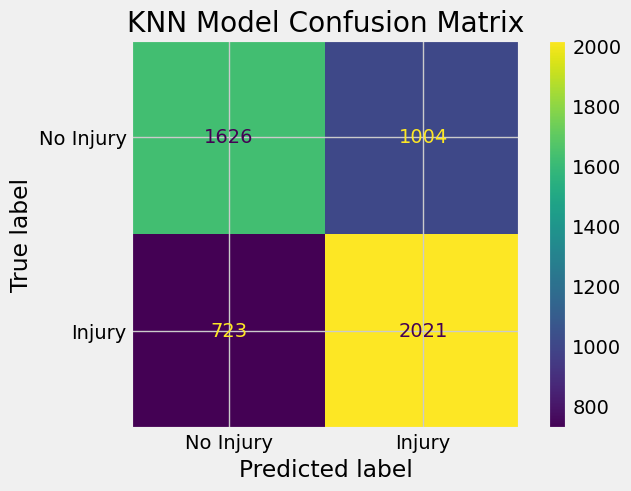

In [62]:
#confusion matrix for KNN model
confusion_matrix = metrics.confusion_matrix(y_test, knn_predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
display_labels = ['No Injury', 'Injury'],)
cm_display.plot()
plt.title('KNN Model Confusion Matrix')
plt.show()

In [63]:
#calculate baseline, accuracy, r^2, sensitivity, and specificity
baseline = (confusion_matrix[0,0] + confusion_matrix[0,1])/len(knn_predictions)
knn_sensitivity = confusion_matrix[1,1]/(confusion_matrix[1,0] + confusion_matrix[1,1])
knn_specificity = confusion_matrix[0,0]/(confusion_matrix[0,0] + confusion_matrix[0,1])
knn_r2 = r2_score(y_test, knn_predictions)

print('Baseline =', baseline)
print('Accuracy =', knn_accuracy)
print('R^2 score =', knn_r2)
print('Sensitivity =', knn_sensitivity)
print('Specificity =', knn_specificity)

Baseline = 0.4893933755117231
Accuracy = 0.6786378861183476
R^2 score = -0.28602717023800284
Sensitivity = 0.7365160349854227
Specificity = 0.6182509505703422


In [64]:
#calculate AUC
knn_probs = knn.predict_proba(X_test.values)[:, 1]
knn_auc = roc_auc_score(y_test, knn_probs)
knn_auc

0.7315587275105588

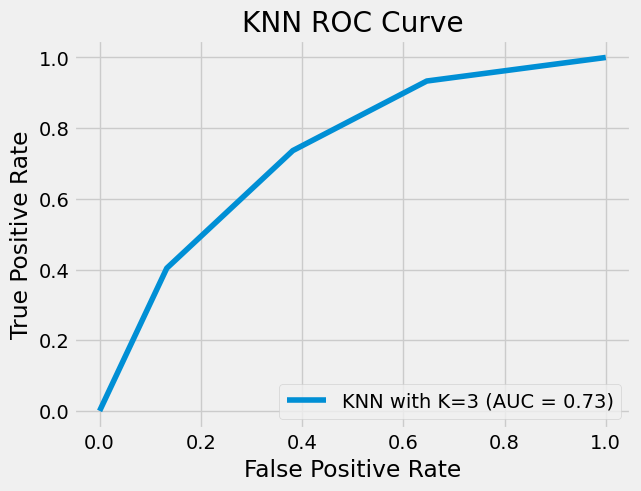

In [65]:
#display ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='KNN with K=3')
display.plot()
plt.title('KNN ROC Curve');


### Model 2: Random Forest

#### Random Forest Data Wrangling

In [18]:
#convert variables to categorical codes
baton_sampled.INJURY = baton_sampled.INJURY.astype('category')
baton_sampled['CRASH OCCURRED ON'] = baton_sampled['CRASH OCCURRED ON'].astype('category')
baton_sampled['KIND OF LOCATION'] = baton_sampled['KIND OF LOCATION'].astype('category')
baton_sampled['TYPE OF ROADWAY'] = baton_sampled['TYPE OF ROADWAY'].astype('category')
baton_sampled['ROAD SURFACE'] = baton_sampled['ROAD SURFACE'].astype('category')
baton_sampled['WEATHER CONDITION'] = baton_sampled['WEATHER CONDITION'].astype('category')
baton_sampled['LIGHTING CONDITION'] = baton_sampled['LIGHTING CONDITION'].astype('category')
baton_sampled['HIT AND RUN'] = baton_sampled['HIT AND RUN'].astype('category')
baton_sampled['PEDESTRIAN INVOLVED'] = baton_sampled['PEDESTRIAN INVOLVED'].astype('category')
baton_sampled['TRAIN INVOLVED'] = baton_sampled['TRAIN INVOLVED'].astype('category')
baton_sampled['INTERSECTION'] = baton_sampled['INTERSECTION'].astype('category')
baton_sampled['TOTAL VEHICLES'] = baton_sampled['TOTAL VEHICLES'].astype('category')
baton_sampled['VEHICLE ALIGNMENT'] = baton_sampled['VEHICLE ALIGNMENT'].astype('category')
baton_sampled['RELATION TO ROADWAY'] = baton_sampled['RELATION TO ROADWAY'].astype('category')
baton_sampled['MANNER OF COLLISION'] = baton_sampled['MANNER OF COLLISION'].astype('category')
baton_sampled['PRIMARY FACTOR'] = baton_sampled['PRIMARY FACTOR'].astype('category')

In [19]:
baton3 = baton_sampled.copy()
baton3.INJURY = baton3.INJURY.astype('category')
baton3['CRASH OCCURRED ON'] = baton3['CRASH OCCURRED ON'].cat.codes
baton3['KIND OF LOCATION'] = baton3['KIND OF LOCATION'].cat.codes
baton3['TYPE OF ROADWAY'] = baton3['TYPE OF ROADWAY'].cat.codes
baton3['ROAD SURFACE'] = baton3['ROAD SURFACE'].cat.codes
baton3['WEATHER CONDITION'] = baton3['WEATHER CONDITION'].cat.codes
baton3['LIGHTING CONDITION'] = baton3['LIGHTING CONDITION'].cat.codes
baton3['HIT AND RUN'] = baton3['HIT AND RUN'].cat.codes
baton3['PEDESTRIAN INVOLVED'] = baton3['PEDESTRIAN INVOLVED'].cat.codes
baton3['TRAIN INVOLVED'] = baton3['TRAIN INVOLVED'].cat.codes
baton3['INTERSECTION'] = baton3['INTERSECTION'].cat.codes
baton3['TOTAL VEHICLES'] = baton3['TOTAL VEHICLES'].cat.codes
baton3['VEHICLE ALIGNMENT'] = baton3['VEHICLE ALIGNMENT'].cat.codes
baton3['RELATION TO ROADWAY'] = baton3['RELATION TO ROADWAY'].cat.codes
baton3['MANNER OF COLLISION'] = baton3['MANNER OF COLLISION'].cat.codes
baton3['PRIMARY FACTOR'] = baton3['PRIMARY FACTOR'].cat.codes

#### Random Forest Training

In [20]:
#gridsearch 5-fold CV with 80-20 train test split
X_train, X_test, y_train, y_test = train_test_split(baton3.drop(columns=['INJURY']), baton3['INJURY'], test_size=0.2, random_state=314)
random_forest_model = RandomForestClassifier(random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(random_forest_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters from grid search
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the model with the best parameters on the training data
best_random_forest_model = grid_search.best_estimator_
best_random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
predictions = best_random_forest_model.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Random Forest Accuracy: {accuracy}")

#display best parameters for random forest and the accuracy for this model

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Random Forest Accuracy: 0.7621883141049498


In [23]:
#run a random forest model using previously calculated ideal parameters
X_train, X_test, y_train, y_test = train_test_split(baton3.drop(columns=['INJURY', 'VEHICLE ALIGNMENT','TRAIN INVOLVED', 'WEATHER CONDITION','ROAD SURFACE']), baton3['INJURY'], test_size=0.2, random_state=314)

# Train the model on the training data
optimal_model = RandomForestClassifier(random_state=42, min_samples_leaf=1, min_samples_split=2, n_estimators=50)
optimal_model.fit(X_train, y_train)

# Make predictions on the test data
predictions = optimal_model.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Random Forest Accuracy: {accuracy}")

# Select one tree from the Random Forest (e.g., the first tree)
one_tree = optimal_model.estimators_[0]

Random Forest Accuracy: 0.739672497208783


##### Feature Importance *Before* Bootstrapping

In [93]:
#put feature importance into a dataframe to visualize sorted feature importance graph
feature = pd.DataFrame({
    'x': X_train.columns.values,
    'y': best_random_forest_model.feature_importances_
})
feature = feature.sort_values('y')
feature

x         y
8        TRAIN INVOLVED  0.000022
11    VEHICLE ALIGNMENT  0.013376
3          ROAD SURFACE  0.013673
4     WEATHER CONDITION  0.024701
14       PRIMARY FACTOR  0.047545
9          INTERSECTION  0.049488
5    LIGHTING CONDITION  0.054447
12  RELATION TO ROADWAY  0.058654
6           HIT AND RUN  0.063100
2       TYPE OF ROADWAY  0.070598
0     CRASH OCCURRED ON  0.073012
1      KIND OF LOCATION  0.087720
10       TOTAL VEHICLES  0.110844
7   PEDESTRIAN INVOLVED  0.122143
13  MANNER OF COLLISION  0.210676

Text(0, 0.5, 'Feature')

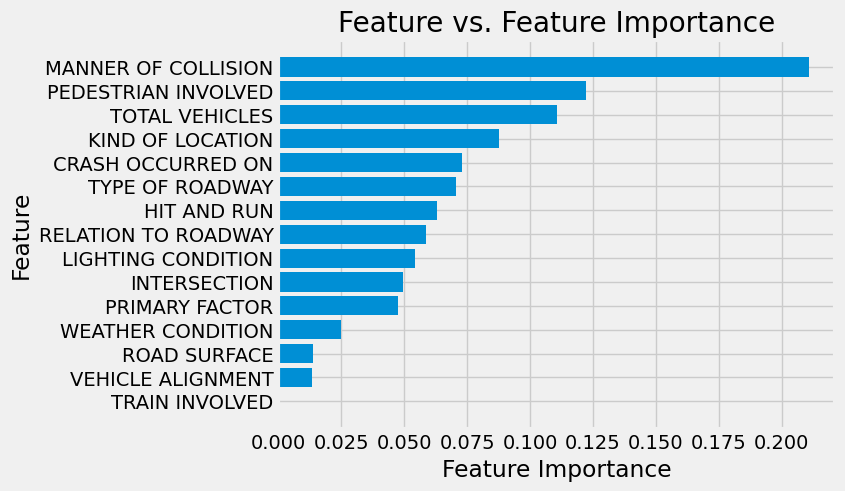

In [94]:
plt.barh(feature.x, feature.y, align='center')
plt.title('Feature vs. Feature Importance')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")

##### Feature Importance *After* Bootstrapping

In [21]:
#put feature importance into a dataframe to visualize sorted feature importance graph
feature = pd.DataFrame({
    'x': X_train.columns.values,
    'y': best_random_forest_model.feature_importances_
})
feature = feature.sort_values('y')
feature

x         y
8        TRAIN INVOLVED  0.000445
11    VEHICLE ALIGNMENT  0.021184
3          ROAD SURFACE  0.021655
9          INTERSECTION  0.032805
7   PEDESTRIAN INVOLVED  0.036209
6           HIT AND RUN  0.038624
4     WEATHER CONDITION  0.041116
10       TOTAL VEHICLES  0.054993
12  RELATION TO ROADWAY  0.059008
14       PRIMARY FACTOR  0.069171
5    LIGHTING CONDITION  0.070352
0     CRASH OCCURRED ON  0.091166
2       TYPE OF ROADWAY  0.099200
1      KIND OF LOCATION  0.148335
13  MANNER OF COLLISION  0.215739

Text(0, 0.5, 'Feature')

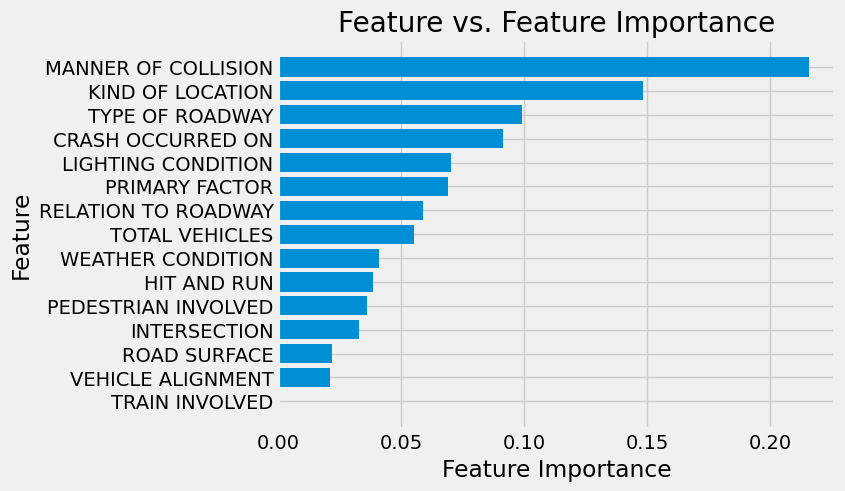

In [22]:
#feature importance graph
plt.barh(feature.x, feature.y, align='center')
plt.title('Feature vs. Feature Importance')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")

##### Decision Tree *Before* Bootstrapping

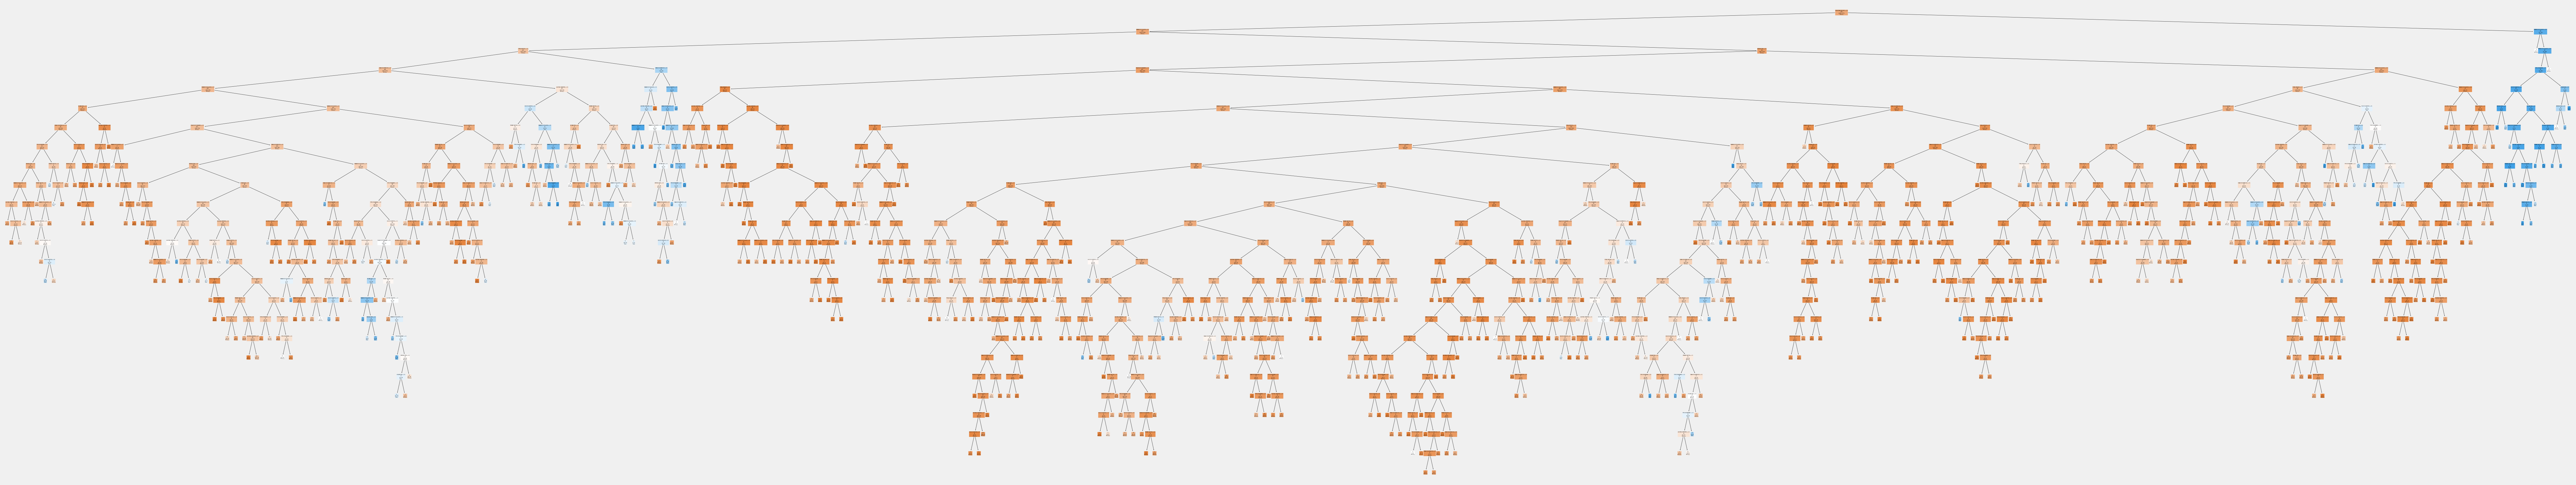

In [117]:
# Visualize the selected tree
plt.figure(figsize=(100, 20))
plot_tree(one_tree, filled=True, max_depth=None, feature_names=X_train.columns, class_names=["No Injury",'Injury'], label='none',impurity=False,node_ids=False, fontsize=2, rounded=True)
plt.savefig('tree_high_dpi', dpi=300)
# plt.show()

##### Decision Tree *After* Bootstrapping

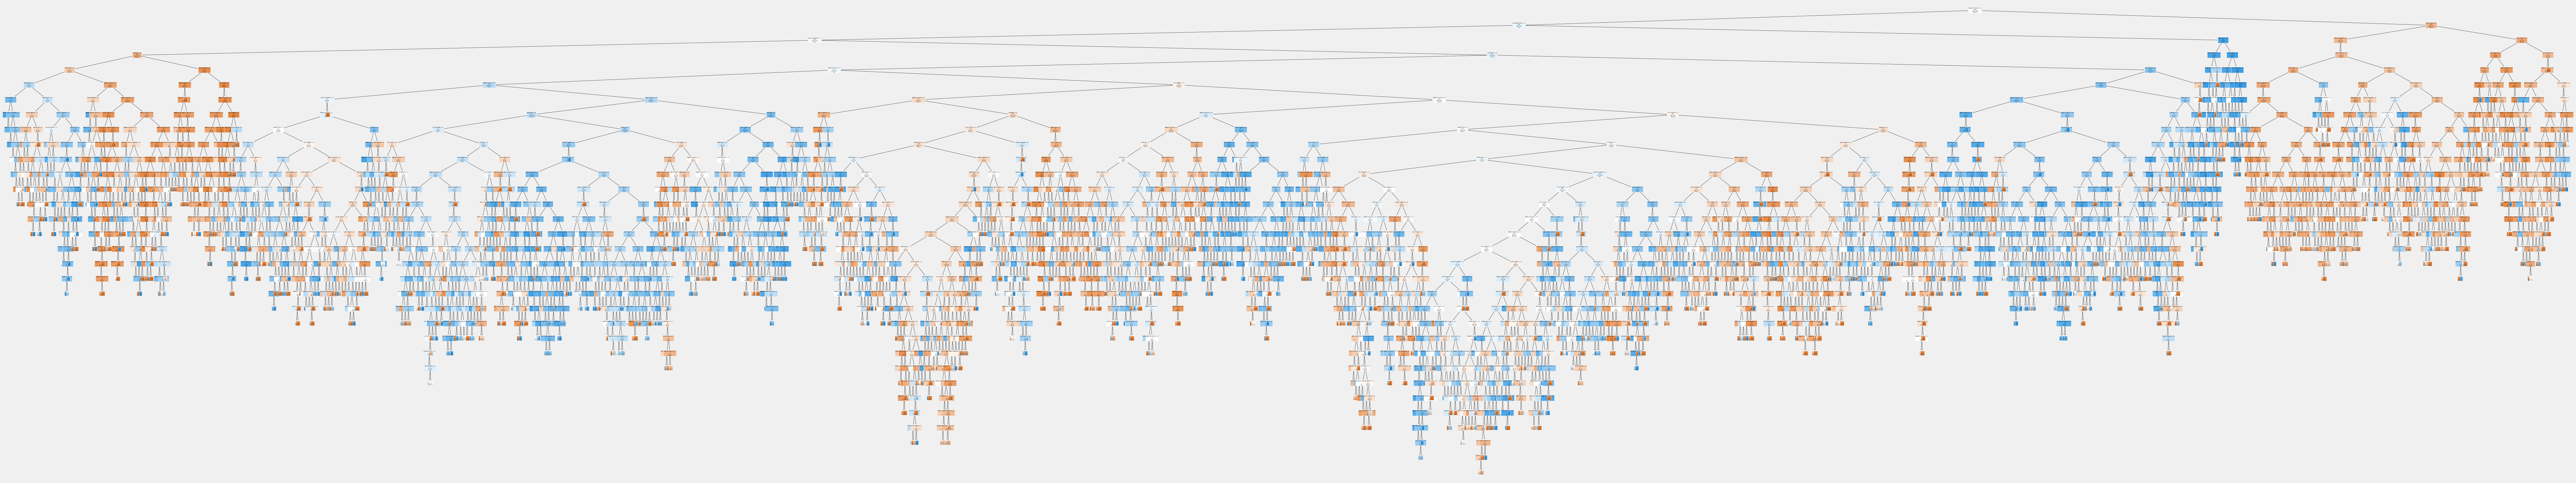

In [24]:
# Visualize the selected tree
plt.figure(figsize=(100, 20))
plot_tree(one_tree, filled=True, max_depth=None, feature_names=X_train.columns, class_names=["No Injury",'Injury'], label='none',impurity=False,node_ids=False, fontsize=2, rounded=True)
plt.savefig('pre_boot_tree', dpi=300)
# plt.show()

#### Model Analysis

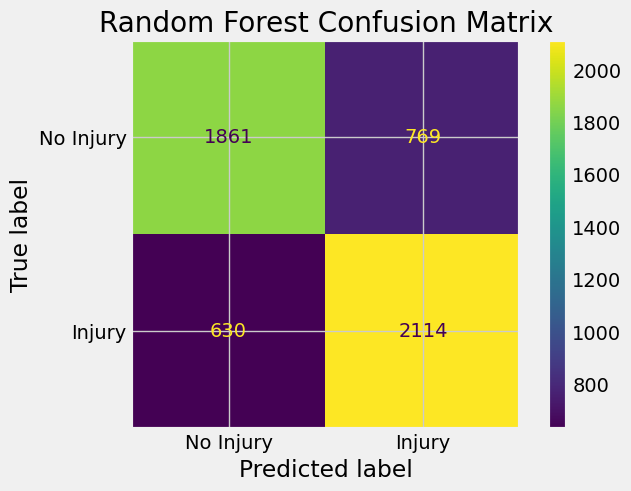

In [26]:
#calculate the confusion matrix for this random forest model
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
display_labels = ['No Injury', 'Injury'],)
cm_display.plot()
plt.title('Random Forest Confusion Matrix')
plt.show()

In [27]:
#calculate baseline, accuracy, r^2, sensitivity, and specificity
dt_sensitivity = confusion_matrix[1,1]/(confusion_matrix[1,0] + confusion_matrix[1,1])
dt_specificity = confusion_matrix[0,0]/(confusion_matrix[0,0] + confusion_matrix[0,1])
dt_r2 = r2_score(y_test, predictions)

print('Baseline =', baseline)
print('Accuracy =', accuracy)
print('R^2 score =', dt_r2)
print('Sensitivity =', dt_sensitivity)
print('Specificity =', dt_specificity)

Baseline = 0.4893933755117231
Accuracy = 0.739672497208783
R^2 score = -0.04177881364387148
Sensitivity = 0.7704081632653061
Specificity = 0.7076045627376426


In [28]:
#calculate AUC for random forest
dt_probs = optimal_model.predict_proba(X_test)[:, 1]
dt_auc = roc_auc_score(y_test, dt_probs)
dt_auc

0.8231598981254642

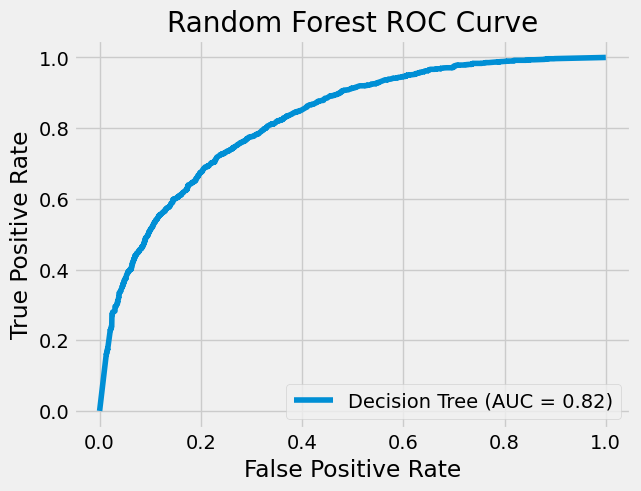

In [29]:
#visualize the random forest ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, dt_probs)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Decision Tree')
display.plot()
plt.title('Random Forest ROC Curve');


#### Decision Tree Key

In [30]:
#this was how we made the dataframe with equal lengthed arrays
injury = list(baton_sampled.INJURY.cat.categories)
injury += (['–'] * 19)
crash_occurred_on = list(baton_sampled['CRASH OCCURRED ON'].cat.categories)
crash_occurred_on += (['–'] * 15)
kind_of_location = list(baton_sampled['KIND OF LOCATION'].cat.categories)
kind_of_location += (['–'] * 14)
type_of_roadway = list(baton_sampled['TYPE OF ROADWAY'].cat.categories)
type_of_roadway += (['–'] * 16)
lighting_condition = list(baton_sampled['LIGHTING CONDITION'].cat.categories)
lighting_condition += (['–'] * 14)
hit_and_run = list(baton_sampled['HIT AND RUN'].cat.categories)
hit_and_run += (['–'] * 19)
pedestrian_involved = list(baton_sampled['PEDESTRIAN INVOLVED'].cat.categories)
pedestrian_involved += (['–'] * 19)
intersection = list(baton_sampled['INTERSECTION'].cat.categories)
intersection += (['–'] * 19)
total_vehicles = list(baton_sampled['TOTAL VEHICLES'].cat.categories)
total_vehicles += (['–'] * 13)
relation_to_roadway = list(baton_sampled['RELATION TO ROADWAY'].cat.categories)
relation_to_roadway += (['–'] * 11)
manner_of_collision = list(baton_sampled['MANNER OF COLLISION'].cat.categories)
primary_factor = list(baton_sampled['PRIMARY FACTOR'].cat.categories)
primary_factor += (['–'] * 9)

In [31]:
#visualize this dataframe so we can match the categorical codes (index) of the decision tree to the category
categories = pd.DataFrame({
    'INJURY': injury,
    'CRASH OCCURRED ON': crash_occurred_on,
    'KIND OF LOCATION': kind_of_location,
    'TYPE OF ROADWAY': type_of_roadway,
    'LIGHTING CONDITION': lighting_condition,
    'RELATION TO ROADWAY': relation_to_roadway,
    'MANNER OF COLLISION': manner_of_collision,
    'PRIMARY FACTOR': primary_factor,
    'TOTAL VEHICLES': total_vehicles,
    'HIT AND RUN': hit_and_run,
    'PEDESTRIAN INVOLVED': pedestrian_involved,
    'INTERSECTION': intersection
    # 'ROAD SURFACE': road_surface,
    # 'WEATHER CONDITION': weather_condition,
    # 'VEHICLE ALIGNMENT': vehicle_alignment,
    # 'TRAIN INVOLVED': train_involved
})
categories

INJURY          CRASH OCCURRED ON             KIND OF LOCATION  \
0       0                City street          Business Continuous   
1       1                 Interstate  Business, Mixed Residential   
2       –  Off road/private property  Manufacturing or Industrial   
3       –                Parish road                 Open Country   
4       –              State highway                        Other   
5       –                 US highway         Residential District   
6       –                          –        Residential Scattered   
7       –                          –                            –   
8       –                          –                            –   
9       –                          –                            –   
10      –                          –                            –   
11      –                          –                            –   
12      –                          –                            –   
13      –                          –                            –   
14      –                          –                            –   
15      –                          –                            –   
16      –                          –                            –   
17      –                          –                            –   
18      –                          –                            –   
19      –                          –                            –   
20      –                          –                            –   

                             TYPE OF ROADWAY  \
0                               ONE-WAY ROAD   
1                                      OTHER   
2       TWO-WAY ROAD WITH A PHYSICAL BARRIER   
3   TWO-WAY ROAD WITH NO PHYSICAL SEPARATION   
4      TWO-WAY ROAD WITH PHYSICAL SEPARATION   
5                                          –   
6                                          –   
7                                          –   
8                                          –   
9                                          –   
10                                         –   
11                                         –   
12                                         –   
13                                         –   
14                                         –   
15                                         –   
16                                         –   
17                                         –   
18                                         –   
19                                         –   
20                                         –   

                           LIGHTING CONDITION            RELATION TO ROADWAY  \
0             Dark - continuous street lights                           Gore   
1                          Dark - not lighted        In parking lane or zone   
2   Dark - street lights at intersection only                         Median   
3                     Dark - unknown lighting  Off roadway, location unknown   
4                                   Dawn/dusk                     On roadway   
5                                    Daylight         On shoulder, left side   
6                                       Other        On shoulder, right side   
7                                           –      Outside road/right-of-way   
8                                           –                       Roadside   
9                                           –       Separator/traffic island   
10                                          –                              –   
11                                          –                              –   
12                                          –                              –   
13                                          –                              –   
14                                          –                              –   
15                                          –                              –   
16                                          –                      

#### Variable Analysis

In [32]:
#pedestrian involved groupby
pedestrian = pd.DataFrame({
    'PEDESTRIAN INVOLVED': baton3['PEDESTRIAN INVOLVED'].astype('category').cat.codes,
    'INJURY': baton3['INJURY'].astype('category').cat.codes,
})
p_mean = pedestrian.groupby('PEDESTRIAN INVOLVED').mean()
p_mean

INJURY
PEDESTRIAN INVOLVED          
0                    0.486173
1                    0.952321

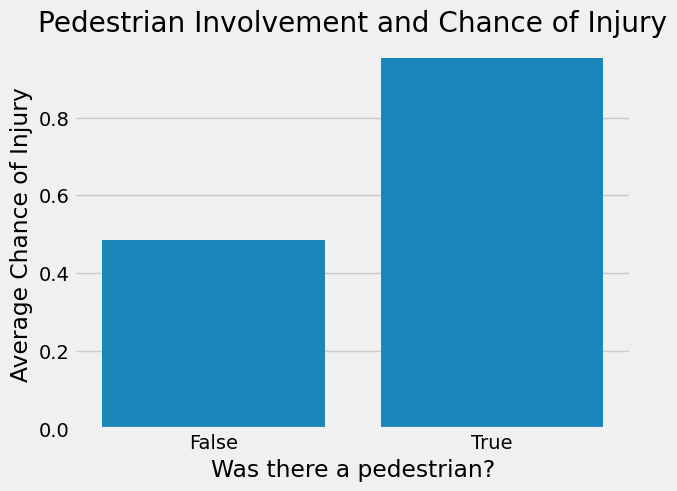

In [33]:
#pedestrian involved bar plot
ax = sns.barplot(pedestrian, x='PEDESTRIAN INVOLVED', y='INJURY',estimator="mean", errorbar=None)
plt.xticks([0, 1], ['False', 'True'])
plt.title('Pedestrian Involvement and Chance of Injury')
ax.set(xlabel='Was there a pedestrian?', ylabel='Average Chance of Injury')
plt.show()

In [82]:
#manner of collision sorted groupby
manner_categories = list(baton2['MANNER OF COLLISION'].cat.categories)
manner = pd.DataFrame({
    'MANNER OF COLLISION': baton3['MANNER OF COLLISION'].astype('category').cat.codes,
    'INJURY': baton3['INJURY'].astype('category').cat.codes,
})
m_mean = manner.groupby('MANNER OF COLLISION').mean()
m_mean['MANNER OF COLLISION'] = manner_categories
m_mean = m_mean.sort_values('INJURY')
m_mean

INJURY  \
MANNER OF COLLISION             
9                    0.062500   
8                    0.063158   
19                   0.081081   
10                   0.104348   
20                   0.119132   
17                   0.142857   
18                   0.177515   
5                    0.221154   
6                    0.222222   
14                   0.236760   
1                    0.239035   
7                    0.247619   
15                   0.249511   
0                    0.264984   
3                    0.275676   
16                   0.304721   
4                    0.375698   
2                    0.393665   
11                   0.466926   
12                   0.505051   
13                   0.518519   

                                                   MANNER OF COLLISION  
MANNER OF COLLISION                                                     
9                                               Backing - rear to rear  
8                                              Backing - rear to front  
19                                          Sideswipe - right overtake  
10                                              Backing - rear to side  
20                                          Sideswipe - same direction  
17                                           Sideswipe - left overtake  
18                                      Sideswipe - opposite direction  
5                                            Angle - right across flow  
6                                              Angle - right into flow  
14                                            Front to rear - rear end  
1                                               Angle - left into flow  
7                                               Angle - right overtake  
15                   Not a collision between two motor vehicles in ...  
0                                             Angle - left across flow  
3                                                Angle - left overtake  
16                                                               Other  
4                                    Angle - perpendicular/other angle  
2                                      Angle - left opposite direction  
11                                            Front to front - head on  
12                                  Front to front - left against flow  
13                                 Front to front - right against flow

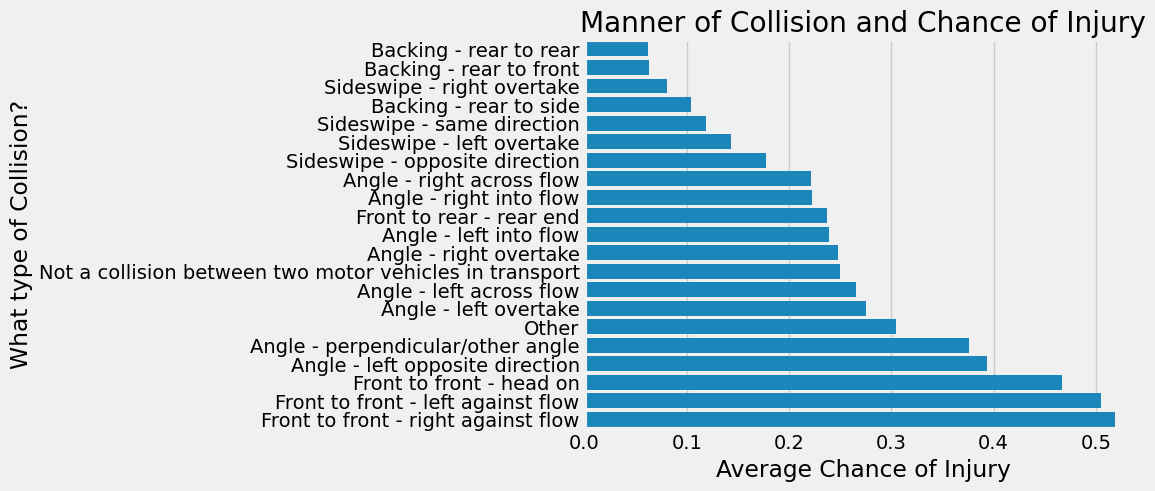

In [88]:
ax = sns.barplot(m_mean, x='INJURY', y='MANNER OF COLLISION', orient='h', estimator="mean", errorbar=None)
# plt.yticks(np.arange(0, 21, 1), manner_categories)
plt.title('Manner of Collision and Chance of Injury')
ax.set(ylabel='What type of Collision?', xlabel='Average Chance of Injury')
plt.show()

In [85]:
#kind of location sorted groupby
location_categories = list(baton2['KIND OF LOCATION'].cat.categories)
location = pd.DataFrame({
    'KIND OF LOCATION': baton3['KIND OF LOCATION'].astype('category').cat.codes,
    'INJURY': baton3['INJURY'].astype('category').cat.codes,
})
l_mean = location.groupby('KIND OF LOCATION').mean()
l_mean['KIND OF LOCATION'] = location_categories
l_mean = l_mean.sort_values('INJURY')
l_mean

INJURY             KIND OF LOCATION
KIND OF LOCATION                                       
6                 0.173913        Residential Scattered
2                 0.220134  Manufacturing or Industrial
4                 0.221865                        Other
0                 0.235122          Business Continuous
1                 0.249485  Business, Mixed Residential
5                 0.253947         Residential District
3                 0.278146                 Open Country

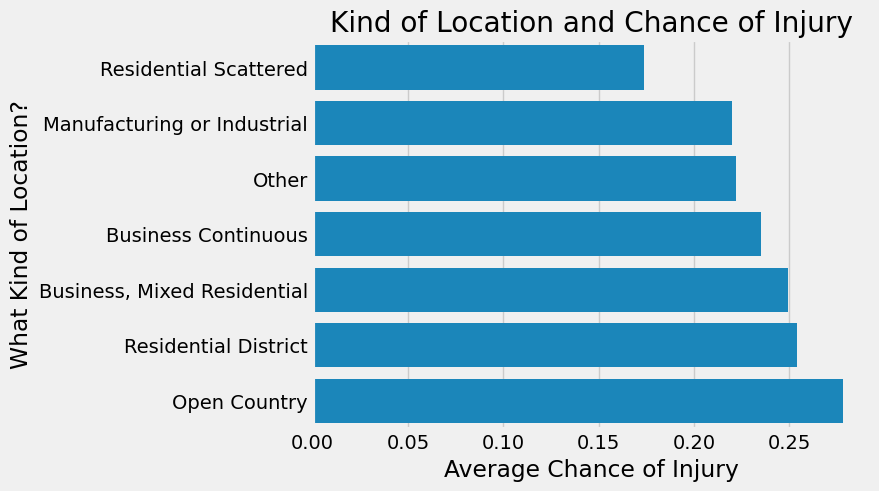

In [89]:
ax = sns.barplot(l_mean, x='INJURY', y='KIND OF LOCATION', orient='h', errorbar=None)
# plt.yticks(np.arange(0, 7, 1), location_categories)
plt.title('Kind of Location and Chance of Injury')
ax.set(ylabel='What Kind of Location?', xlabel='Average Chance of Injury')
plt.show()

In [52]:
#type of street the crash occurred on groupby
crash = pd.DataFrame({
    'CRASH OCCURRED ON': baton3['CRASH OCCURRED ON'].astype('category').cat.codes,
    'INJURY': baton3['INJURY'].astype('category').cat.codes,
})
c_mean = crash.groupby('CRASH OCCURRED ON').mean()
c_mean

INJURY
CRASH OCCURRED ON          
0                  0.505777
1                  0.483686
2                  0.245033
3                  0.429825
4                  0.504680
5                  0.570411

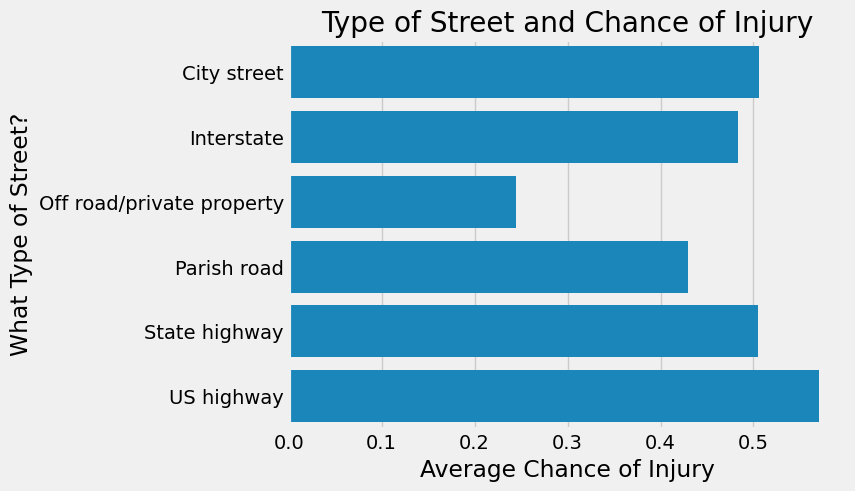

In [54]:
#type of street the crash occurred on bar chart
crash_categories = list(baton2['CRASH OCCURRED ON'].astype('category').cat.categories)
ax = sns.barplot(crash, x='INJURY', y='CRASH OCCURRED ON', orient='h', estimator="mean", errorbar=None)
plt.yticks(np.arange(0, 6, 1), crash_categories)
plt.title('Type of Street and Chance of Injury')
ax.set(ylabel='What Type of Street?', xlabel='Average Chance of Injury')
plt.show()

In [55]:
#total vehicles groupby
vehicles = pd.DataFrame({
    'TOTAL VEHICLES': baton3['TOTAL VEHICLES'].astype('category').cat.codes,
    'INJURY': baton3['INJURY'].astype('category').cat.codes,
})
v_mean = vehicles.groupby('TOTAL VEHICLES').mean()
v_mean

INJURY
TOTAL VEHICLES          
0               0.630073
1               0.459523
2               0.707188
3               0.718023
4               0.828947
5               0.904762
6               0.900000
7               0.833333

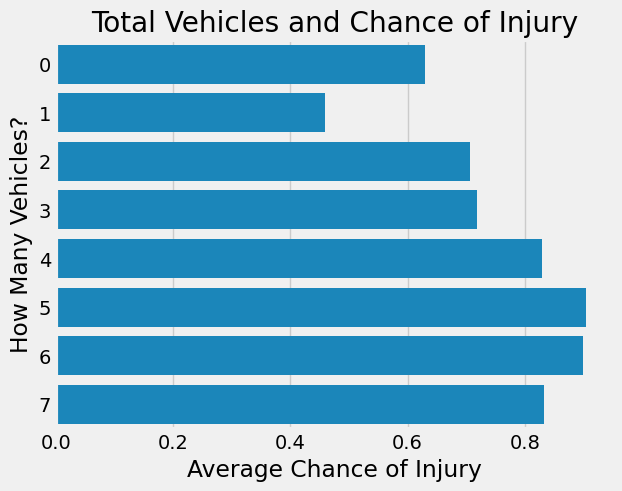

In [56]:
#total vehicles bar plot
ax = sns.barplot(vehicles, x='INJURY', y='TOTAL VEHICLES', orient='h', estimator="mean", errorbar=None)
plt.title('Total Vehicles and Chance of Injury')
ax.set(ylabel='How Many Vehicles?', xlabel='Average Chance of Injury')
plt.show()